# MNIST Implementaiton with ANN in Keras

In [1]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#Lets see how does one look like. We see that data is between zero & 255
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
#Printing min & max
print("X_train.min",X_train.min(),"X_train.max",X_train.max())
print("X_test.min",X_test.min(),"X_test.max",X_test.max())

X_train.min 0 X_train.max 255
X_test.min 0 X_test.max 255


In [5]:
#Lets do a min max scaling to make it between 0 & 1. This will be good for us in training.
X_train=(X_train - X_train.min()) /(X_train.max() - X_train.min())
X_test=(X_test - X_test.min()) /(X_test.max() - X_test.min())

In [6]:
#Printing min & max
print("X_train.min",X_train.min(),"X_train.max",X_train.max())
print("X_test.min",X_test.min(),"X_test.max",X_test.max())

X_train.min 0.0 X_train.max 1.0
X_test.min 0.0 X_test.max 1.0


In [7]:
#Lets see how does one look like now. We see that data is between zero & 1
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

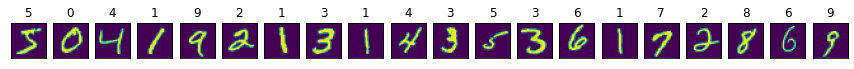

In [8]:
# Display some images (28 X 28 pixels)
fig, axes = plt.subplots(ncols=20, sharex=False, sharey=True, figsize=(15, 4))
for i in range(20):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i])
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))      # Input layer 784 neurons
model.add(Dense(16, activation='sigmoid'))   # 1st Hidden layer 16 neurons
model.add(Dense(16, activation='sigmoid'))   # 2nd Hidden layer 16 neurons
model.add(Dense(10, activation='softmax'))   # Output layer 10 neurons

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Lets see how is our input & output data shapes currently.
print ("Input ----> X_train.shape:",X_train.shape,"X_test.shape:",X_test.shape)
print ("Output ----> y_train.shape:",y_train.shape,"y_test.shape:",y_test.shape)

Input ----> X_train.shape: (60000, 28, 28) X_test.shape: (10000, 28, 28)
Output ----> y_train.shape: (60000,) y_test.shape: (10000,)


In [11]:
# Means we will need to reshape the input to (n,784) as our input layer is 784 nodes.
# And we have already mentiion to flatten (28 x28) in the model. So, that will take care of the input layer flattening.
# But we will need to reshape on the output to (n,10) as our output layer is of 10 nodes
# For this we will do the one hot encoding technique

#Lets see how one is looking like currenlty.
print("y_train[0]:",y_train[0])
print("y_train[1]:",y_train[1])
print("y_train[2]:",y_train[2])

y_train[0]: 5
y_train[1]: 0
y_train[2]: 4


### If you use sparse_categorical_crossentropy loss function, you don't need to do this. Keras will internally take care of the conversion.

In [12]:
# Lets do a one hot encoding to convert it to a (n,10) shape
# Convert y_train into one-hot format 
y_train_hot = to_categorical(y_train, num_classes=10)
y_test_hot = to_categorical(y_test, num_classes=10)

In [13]:
#Lets see how one is looking like currenlty.
print("y_train_hot[0]:",y_train_hot[0])
print("y_train_hot[1]:",y_train_hot[1])
print("y_train_hot[2]:",y_train_hot[2])

y_train_hot[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train_hot[1]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train_hot[2]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
#Lets see how is our input & output data shapes currently. Looks good now
print ("Input ----> X_train.shape:",X_train.shape,"X_test.shape:",X_test.shape)
print ("Output ----> y_train.shape:",y_train.shape,"y_test.shape:",y_test.shape)
print ("Output ----> y_train_hot.shape:",y_train_hot.shape,"y_test_hot.shape:",y_test_hot.shape)

Input ----> X_train.shape: (60000, 28, 28) X_test.shape: (10000, 28, 28)
Output ----> y_train.shape: (60000,) y_test.shape: (10000,)
Output ----> y_train_hot.shape: (60000, 10) y_test_hot.shape: (10000, 10)


In [15]:
# Train the Neural Network model
hist=model.fit(X_train, y_train_hot, epochs=10, validation_data=(X_test,y_test_hot))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1906 - acc: 0.7069 - val_loss: 0.5479 - val_acc: 0.8774
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4068 - acc: 0.8980 - val_loss: 0.3208 - val_acc: 0.9111
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2883 - acc: 0.9196 - val_loss: 0.2678 - val_acc: 0.9238
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2468 - acc: 0.9308 - val_loss: 0.2429 - val_acc: 0.9297
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2221 - acc: 0.9370 - val_loss: 0.2261 - val_acc: 0.9348
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2034 - acc: 0.9420 - val_loss: 0.2156 - val_acc: 0.9378
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1901 - acc: 0.9456 - val_loss: 0.2070 - val_acc: 0.9404
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

### Got 94.21% accuracy with in 10 epochs

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


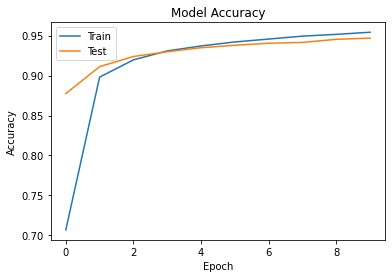

In [16]:
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
# Making predictions using our trained model
y_predicted = model.predict(X_test)
print(y_predicted[0])

[8.09005724e-06 1.26691570e-03 5.19980786e-05 5.41894697e-04
 1.34783195e-05 3.29400791e-04 3.59107446e-08 9.97536659e-01
 3.62419451e-05 2.15268854e-04]


In [18]:
#The rpedictions are in (n,10). Meaning to say we will need to take the occurance for which max value has come
y_predicted_labels = np.argmax(y_predicted, axis=1)
print(y_predicted_labels[0])

7


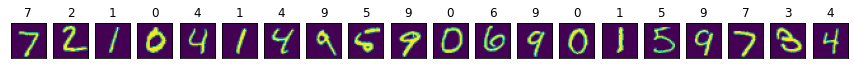

In [19]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=20, sharex=False, sharey=True, figsize=(15, 4))
for i in range(20):
    axes[i].set_title(y_predicted_labels[i])
    axes[i].imshow(X_test[i])
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()